In [123]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import scipy

In [61]:
resp = nsfg.ReadFemResp() 

In [62]:
timesmar=resp['timesmar']
timesmar=timesmar.dropna()
jintendn=resp['jintendn']
jintendn=jintendn.dropna() 

In [63]:
mean_ts=timesmar.mean()
mean_ts


1.387057682985943

In [64]:
standart_deviation_ts =timesmar.std()
standart_deviation_ts

4.297113023253083

In [65]:
mean_j = jintendn.mean()
mean_j

2.7052556818181817

In [66]:
standart_deviation_j= jintendn.std()
standart_deviation_j

9.710108051456988

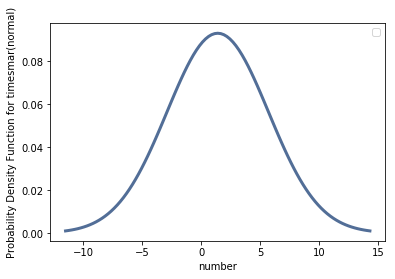

In [151]:
pdf = thinkstats2.NormalPdf(mean_ts,standart_deviation_ts )
pdf.Density(mean_ts+standart_deviation_ts )
thinkplot.Pdf(pdf_ts)
thinkplot.Config(xlabel='number', ylabel='Probability Density Function for timesmar(normal)')


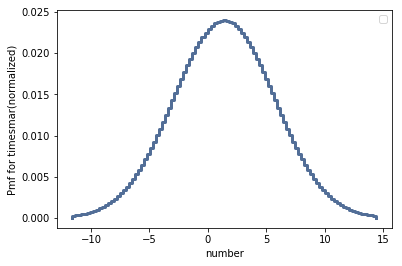

In [152]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='number', ylabel='Pmf for timesmar(normalized)')

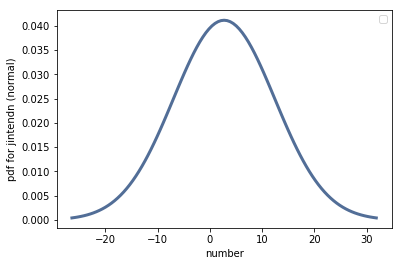

In [153]:
pdf= thinkstats2.NormalPdf(mean_j, standart_deviation_j)
pdf.Density(mean_j+standart_deviation_j )
thinkplot.Pdf(pdf_j, label='') 
thinkplot.Config(xlabel='number', ylabel='pdf for jintendn (normal)')


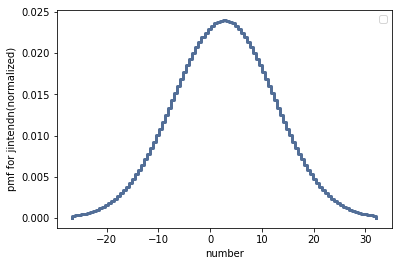

In [154]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='')
thinkplot.Config(xlabel='number', ylabel='pmf for jintendn(normalized)')

In [155]:
# we find mean and standart deviation of jintend and timesmar. After we use these infirmations for pdf and pmf graph
#after question: above I separeted normal(pdf) for timespan and jintendn
#

In [156]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
    

In [157]:
timesmar1 = Jitter(resp["timesmar"])
jintend1 = Jitter(resp.jintendn)

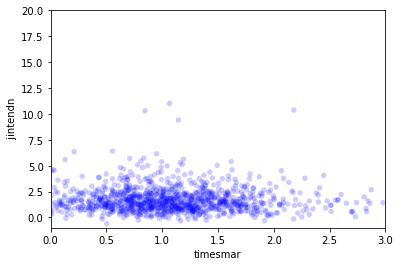

In [158]:
thinkplot.Scatter(timesmar1, jintend1)
thinkplot.Config(xlabel='timesmar',alpha=0.01,s=2,
                 ylabel=' jintendn',
                 axis=[0,3,-1,20], #focus lots of dot.
                 legend=False)

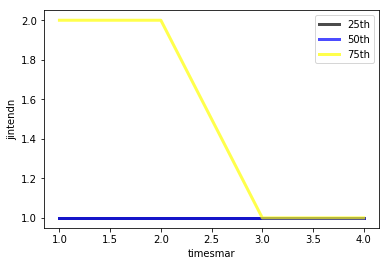

In [159]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(-1,5, 1)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

CustomColors = ["black","blue","yellow"] 
percent =[25, 50, 75] 
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label_name = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label_name,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar',ylabel='jintendn',legend=True)

In [160]:
def Cov(xs,ys,meanx=None,meany=None):
    xs=np.array(xs)
    ys=np.array(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov



In [161]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    


In [162]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)


In [163]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')


In [166]:


scipy.stats.mstats.pointbiserialr(resp.timesmar, resp.jintendn)

PointbiserialrResult(correlation=masked, pvalue=masked)

In [167]:
scipy.stats.mstats.spearmanr(resp.timesmar, resp.jintendn)#rank order 

SpearmanrResult(correlation=0.2765450353651131, pvalue=masked_array(data=3.24054829e-134,
             mask=False,
       fill_value=1e+20))